In [1]:
#Initial Imports
import os
import pandas as pd
from pandas.tseries.offsets import DateOffset
from dotenv import load_dotenv
from time import sleep
import cbpro
import matplotlib.pyplot as plt

In [2]:
#load .env environment variables
load_dotenv()

True

In [3]:
#Set Alpaca API Key and secret
coinbase_api_key = os.getenv("COINBASE_API_KEY")
coinbase_secret_key = os.getenv("COINBASE_SECRET_KEY")
coinbase_pass_phrase = os.getenv("COINBASE_PASS_PHRASE")


#set the paper trading url
base_url = "https://api-public.sandbox.pro.coinbase.com"

In [4]:
#Authenticate Coinbase Pro API key - Activate Client
client = cbpro.AuthenticatedClient(
    coinbase_api_key,
    coinbase_secret_key,
    coinbase_pass_phrase,
    base_url
)

In [5]:

#Get the current time in ISO 8601 - format
time = client.get_time()
time

#Set Dates
date2 = pd.to_datetime(time['iso'])

#Initialize Loop Variables
dates = []
count = 0
combined = pd.DataFrame()

#Call while loop to collect 300 candlesticks worth of hourly data
while count<200:
    
    #Set a delay - give loop time to 
    sleep(0.5)

    
    #Grab the current date
    ts = pd.to_datetime(date2)
    start_date = ts - DateOffset(days = 12)
    date1 = str(start_date.date())
    date2 = str(ts.date())

    # Get the last 300 hours of Bitcoin Price action
    hist_rates1=client.get_product_historic_rates('BTC-USD',start=f'{date1}T00:00:00.0Z',end=f'{date2}T00:00:00.0Z',granularity=3600)   
    

    #Convert hist_rate into dataframe
    df1 = pd.DataFrame(hist_rates1)
    
    #Rename dataframe
    df1.rename(columns={
        0:'date',
        1:'low',
        2:'high',
        3:'open',
        4:'close',
        5:'volume'

    }, inplace=True)    

    #Convert date into datetime format from UNIX
    df1['date'] = pd.to_datetime(df1['date'],unit='s')

    #combine data frames
    if combined.empty:
        combined = df1
    else:
        combined  = pd.concat([combined,df1],axis='rows' ,join='inner')
    dates.append(date2)
    date2=date1
    print(date2)
    count+=1

2021-03-08
2021-02-24
2021-02-12
2021-01-31
2021-01-19
2021-01-07
2020-12-26
2020-12-14
2020-12-02
2020-11-20
2020-11-08
2020-10-27
2020-10-15
2020-10-03
2020-09-21
2020-09-09
2020-08-28
2020-08-16
2020-08-04
2020-07-23
2020-07-11
2020-06-29
2020-06-17
2020-06-05
2020-05-24
2020-05-12
2020-04-30
2020-04-18
2020-04-06
2020-03-25
2020-03-13
2020-03-01
2020-02-18
2020-02-06
2020-01-25
2020-01-13
2020-01-01
2019-12-20
2019-12-08
2019-11-26
2019-11-14
2019-11-02
2019-10-21
2019-10-09
2019-09-27
2019-09-15
2019-09-03
2019-08-22
2019-08-10
2019-07-29
2019-07-17
2019-07-05
2019-06-23
2019-06-11
2019-05-30
2019-05-18
2019-05-06
2019-04-24
2019-04-12
2019-03-31
2019-03-19
2019-03-07
2019-02-23
2019-02-11
2019-01-30
2019-01-18
2019-01-06
2018-12-25
2018-12-13
2018-12-01
2018-11-19
2018-11-07
2018-10-26
2018-10-14
2018-10-02
2018-09-20
2018-09-08
2018-08-27
2018-08-15
2018-08-03
2018-07-22
2018-07-10
2018-06-28
2018-06-16
2018-06-04
2018-05-23
2018-05-11
2018-04-29
2018-04-17
2018-04-05
2018-03-24

KeyError: 'date'

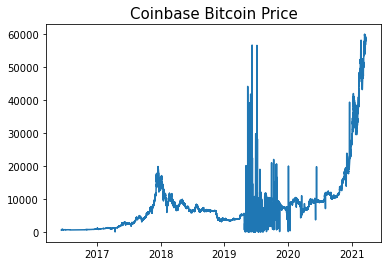

In [7]:
#Clean up the data

#Drop duplicate date values
combined.drop_duplicates(subset=['date'],inplace=True)

#Drop any NA Value
combined.dropna(inplace=True)

#Accept values only 
new_data = pd.DataFrame()
new_data = combined[combined['close'] < 60000]  
new_data = new_data[new_data['open'] < 60000]  
new_data = new_data[new_data['close'] > 600]

#Export bitcoins hourly prices to 'BTC.csv'
combined.to_csv('Data/Coinbase_Bitcoin_Data.csv', index = False)

#Print out combined
fig = plt.figure()

plt.plot(new_data['date'],new_data['open'])
plt.title('Coinbase Bitcoin Price', fontsize=15)

#Save the plot
fig.savefig('images/Coinbase_Bitcoin_Data.png', dpi=300)